In [ ]:
pip install deepxde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 12.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
import deepxde as dde
from deepxde.backend import tf

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


No backend selected.
Finding available backend...
Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


In [ ]:
# from deepxde.layers import Input, Dense

In [ ]:
geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 0.99)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [ ]:
def pde(x, y):
    u=y[:,0:1]
    v=y[:,1:2]
    dy_x = dde.grad.jacobian(y, x,i=0, j=0)
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    dv_t = dde.grad.jacobian(y, x, i=1, j=1)
    pde1 = dy_t + u* dy_x - v / np.pi * dy_xx
    pde2 = dv_t-0.01
    #return pde1
    return [pde1,pde2,]

In [ ]:
bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, lambda x: -np.sin(np.pi * x[:, 0:1]), lambda _, on_initial: on_initial)
ic2 = dde.icbc.IC(geomtime, lambda x: x[:,1:2]-0.05, lambda _, on_initial: on_initial)

In [ ]:
# !unzip test_2_1.zip

In [ ]:
data = dde.data.TimePDE(
    geomtime, pde, [bc, ic], num_domain=2540, num_boundary=80, num_initial=160
)

Compiling model...
Building feed-forward neural network...
'build' took 0.090703 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.755614 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [2.10e-01, 7.77e-04, 8.10e-02, 5.96e-01]    [2.10e-01, 7.77e-04, 8.10e-02, 5.96e-01]    []  
1000      [3.50e-03, 2.23e-04, 2.46e-03, 6.29e-03]    [3.50e-03, 2.23e-04, 2.46e-03, 6.29e-03]    []  
2000      [1.61e-03, 2.25e-04, 4.80e-04, 7.68e-04]    [1.61e-03, 2.25e-04, 4.80e-04, 7.68e-04]    []  
3000      [1.49e-04, 6.15e-05, 4.62e-05, 3.68e-05]    [1.49e-04, 6.15e-05, 4.62e-05, 3.68e-05]    []  
4000      [3.40e-05, 3.22e-05, 1.69e-05, 1.52e-05]    [3.40e-05, 3.22e-05, 1.69e-05, 1.52e-05]    []  
5000      [1.50e-05, 2.01e-05, 9.45e-06, 8.24e-06]    [1.50e-05, 2.01e-05, 9.45e-06, 8.24e-06]    []  
6000      [1.09e-05, 1.34e-05, 6.44e-06, 6.02e-06]    [1.09e-05, 1.34e-05, 6.44e-06, 6.02e-06]    []  
7000      [3.51e-05, 9.79e-06, 7.21e-06, 6.04e-06]    [3.51e-05, 9.79e-06, 7.21e-06, 6.04e-06]    []  
8000      [5.46e-04,

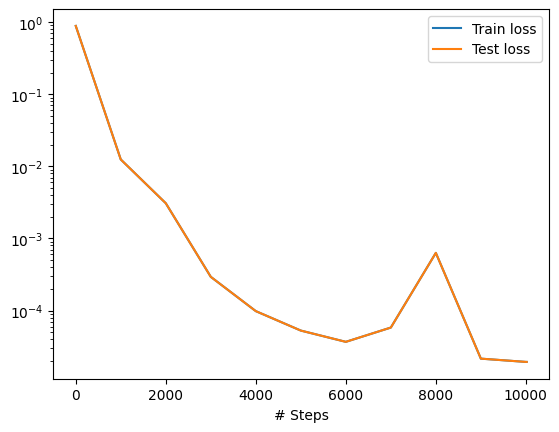

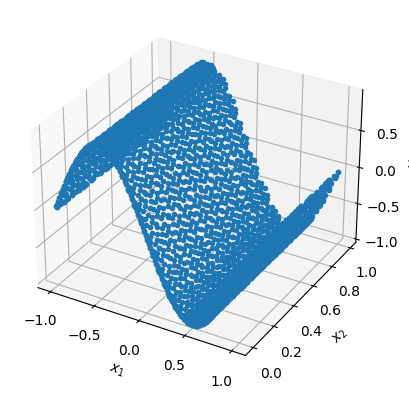

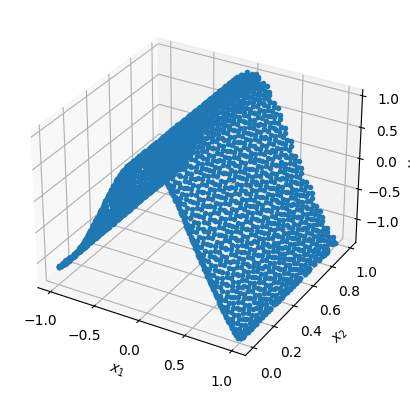

In [ ]:
net = dde.nn.FNN([2] + [20] * 2 + [2], "tanh", "Glorot uniform")
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)
# model.restore("./checkpoints_save/test_2_1-14707.ckpt", verbose=1)
model.train(iterations=10000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)


In [ ]:
data=np.loadtxt('test.dat')
import matplotlib.pyplot as plt

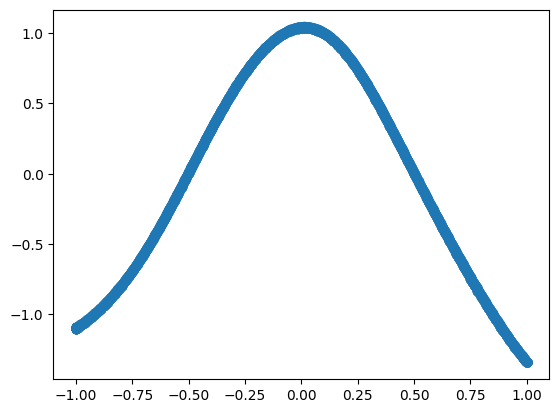

In [ ]:
plt.scatter(data[:,0],data[:,3])

In [ ]:
# model.predict